# 1.Importation des dépendances

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


# 2.Importation de la data

In [33]:
df= pd.read_csv('data/data2.csv')
df.head()

,Annee,Mois,Temperature_maximale
0,2023,janvier,8.3
1,2023,fevrier,10.6
2,2023,mars,13.3
3,2023,avril,15.6
4,2023,mai,21.0


# Affichage des données

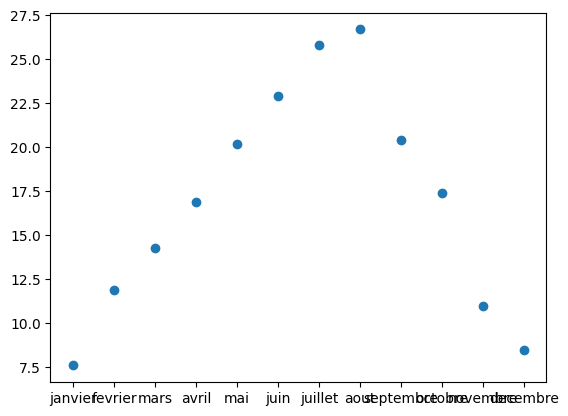

In [34]:

df_2024 = df[df["Annee"]==2024]
plt.scatter(df_2024["Mois"], df_2024["Temperature_maximale"])
plt.show()

In [35]:
mois_to_num = {
    "Janvier": 0,
    "Fevrier": 1,
    "Mars": 2,
    "Avril": 3,
    "Mai": 4,
    "Juin": 5,
    "Juillet": 6,
    "Aout": 7,
    "Septembre": 8,
    "Octobre": 9,
    "Novembre": 10,
    "Decembre": 11
}

# Preprocessing

In [42]:
X = df_2024["Mois"].map(lambda x: mois_to_num[x.capitalize()])
y = df_2024["Temperature_maximale"]
data=[(x, y) for x, y in zip(X, y)]

# Création des modèles

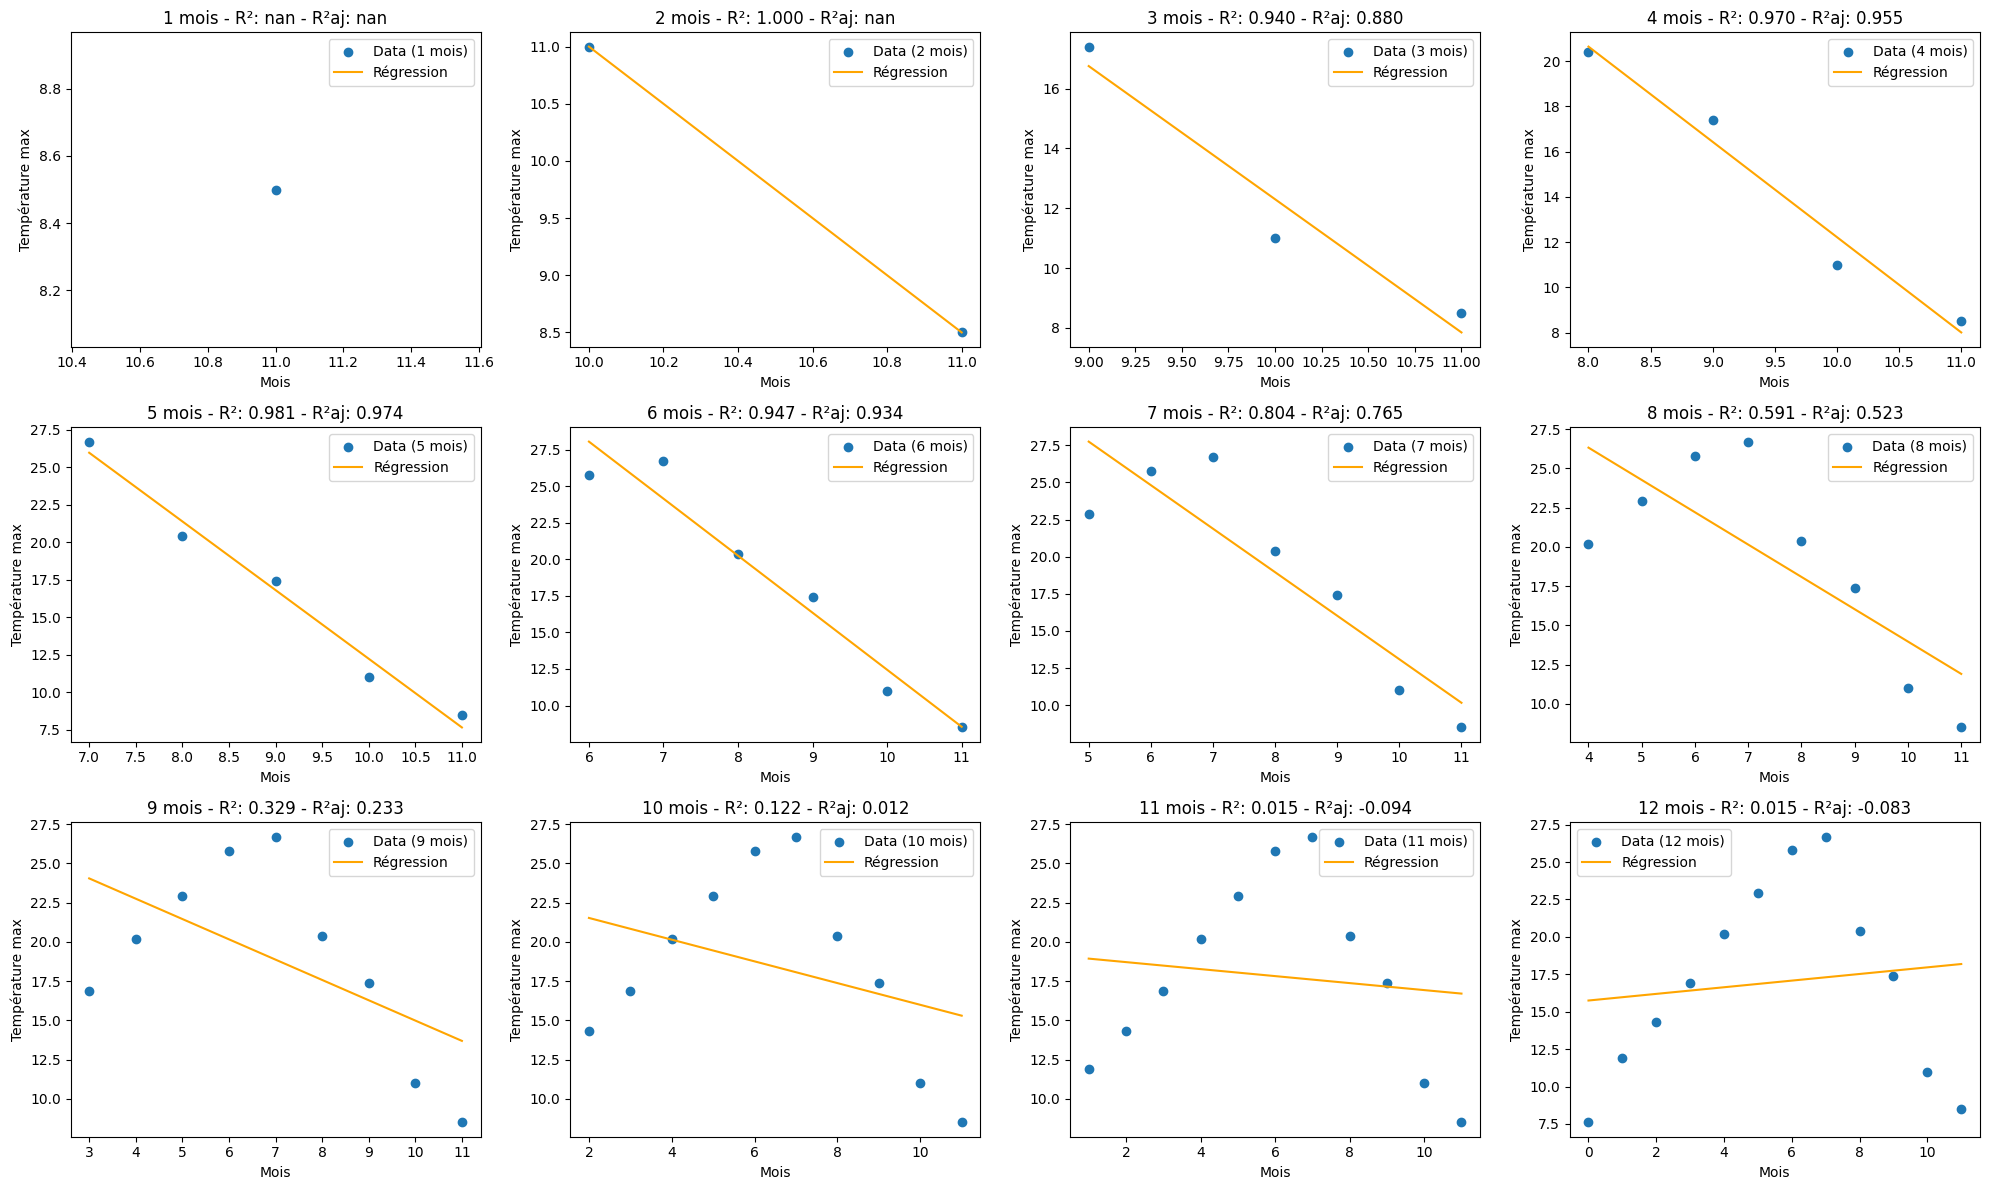

In [89]:
n=len(data)
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()
models = []
for i in range(n):
    selected = data[-(i+1):]
    X_selected = np.array([x[0] for x in selected]).reshape(-1, 1)
    y_selected = np.array([x[1] for x in selected])

    model = LinearRegression()
    model.fit(X_selected, y_selected)
    
    y_pred = model.predict(X_selected)

    r2 = r2_score(y_selected, y_pred)
    n_samples = len(y_selected)
    r2_adj = 1 - (1 - r2) * (n_samples - 1) / (n_samples - 1 - 1)

    models.append({"model": model, "r2": r2, "r2_adj": r2_adj, "mois": i + 1, "X": X_selected, "y": y_selected})
    axes[i].scatter(X_selected, y_selected, label=f"Data ({i+1} mois)")
    axes[i].plot(X_selected, y_pred,color="Orange", label="Régression")
    axes[i].set_title(f"{i+1} mois - R²: {r2:.3f} - R²aj: {r2_adj:.3f}")
    axes[i].set_xlabel("Mois")
    axes[i].set_ylabel("Température max")
    axes[i].legend()
plt.tight_layout()
plt.show()


In [90]:
models.sort(key=lambda x: x["r2_adj"], reverse=True)
for i, model_info in enumerate(models):
  if not np.isnan(model_info["r2_adj"]):
    best_model = model_info
    break

print(f"Meilleur modèle avec {best_model['mois']} mois:")
print(f"Coefficient: {best_model['model'].coef_[0]}")
print(f"Intercept: {best_model['model'].intercept_}")
print(f"R² ajusté: {best_model['r2_adj']:.3f}")

Meilleur modèle avec 5 mois:
Coefficient: -4.58
Intercept: 58.019999999999996
R² ajusté: 0.974


#### La valeur optimisé de n est **5**. En effet, la veleur du coefficient de détermination R2 associé est de **0.974**. La valeur de R2 non ajusté est **0.98**. **B0=-4.58** & **B1=58**

In [87]:
X_test = np.array([[12]])  # janvier 2025, car décembre 2024 = 11
y_pred = best_model["model"].predict(X_test)
print(f"Prédiction de la température maximale pour janvier 2025 : {y_pred[0]:.2f} °C")
print(f"L'erreur est de {7.5 - y_pred[0]:.2f} °C")

Prédiction de la température maximale pour janvier 2025 : 3.06 °C
L'erreur est de 4.44 °C


In [93]:
import statsmodels.api as sm

# Reprendre les données du meilleur modèle :
X_selected = best_model["X"]
y_selected = best_model["y"]

X_selected = sm.add_constant(X_selected)  # Ajoute constante pour β0
model = sm.OLS(y_selected, X_selected).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     153.6
Date:                Tue, 27 May 2025   Prob (F-statistic):            0.00113
Time:                        19:18:39   Log-Likelihood:                -6.5961
No. Observations:                   5   AIC:                             17.19
Df Residuals:                       3   BIC:                             16.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.0200      3.366     17.235      0.0

C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### H0 : "la pente 𝛽1=0 <=> il n’y a pas de relation linéaire entre le mois et la température."

#### Ici la p-value pour H0 est 0.001< α = 0.05, donc il existe une relation linéaire significative entre le mois et la température.

# Régression linéaire multivariée

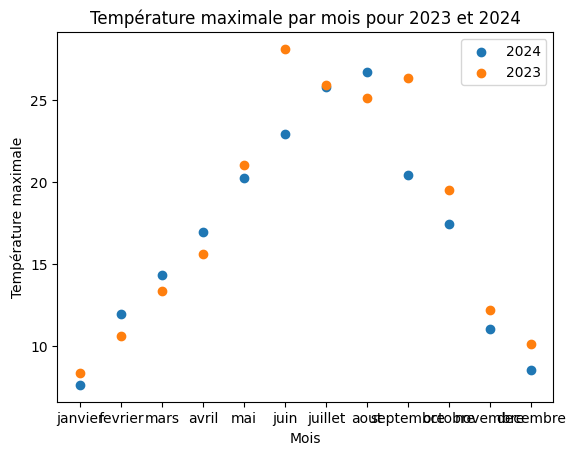

In [100]:
df_2024= df[df["Annee"]==2024]
df_2023 = df[df["Annee"]==2023]
plt.scatter(df_2024["Mois"], df_2024["Temperature_maximale"], label="2024")
plt.scatter(df_2023["Mois"], df_2023["Temperature_maximale"], label="2023")
plt.xlabel("Mois")
plt.ylabel("Température maximale")
plt.title("Température maximale par mois pour 2023 et 2024")
plt.legend()
plt.show()

In [177]:
import itertools

X_all = []
y_all = []

for i in range(12, 24):
    X_all.append(df["Temperature_maximale"].values[i-12:i])  # les 12 mois précédents
    y_all.append(df["Temperature_maximale"].values[i])       # mois courant
X_all = np.array(X_all)
y_all = np.array(y_all)
# print(X_all)
# print(y_all[3])
n_features = X_all.shape[1]
best_r2_adj = -np.inf
best_model_info = None

# Tester toutes les combinaisons de colonnes
for k in range(1, n_features):
    for cols in itertools.combinations(range(n_features), k):
        X_subset = X_all[:, cols]
        model = LinearRegression()
        model.fit(X_subset, y_all)
        y_pred = model.predict(X_subset)
        r2 = r2_score(y_all, y_pred)
        n_samples = len(y_all)
        p = X_subset.shape[1]
        r2_adj = 1 - (1 - r2) * (n_samples - 1) / (n_samples - p - 1)

        if r2_adj > best_r2_adj:
            best_r2_adj = r2_adj
            best_model_info = {
                "model": model,
                "cols": cols,
                "r2_adj": r2_adj,
                "X": X_subset,
                "y": y_all
            }


In [178]:
print(f"Meilleur modèle avec {len(best_model_info['cols'])} colonnes")
print(f"R² ajusté: {best_model_info['r2_adj']:.3f}")
print(f"Coefficients: {best_model_info['model'].coef_}")

Meilleur modèle avec 10 colonnes
R² ajusté: 1.000
Coefficients: [ 0.56005682 -0.89698191  1.07036965 -1.17224621  1.24616424 -0.77416305
 -0.05157051  0.21293519 -1.05735408  1.51264374]


[ 7.60481766 11.88935552 14.31117707 16.88821962 20.21116926 22.89397902
 25.80331801 26.69734278 20.39750963 17.40777388 10.99255031  8.50278726]


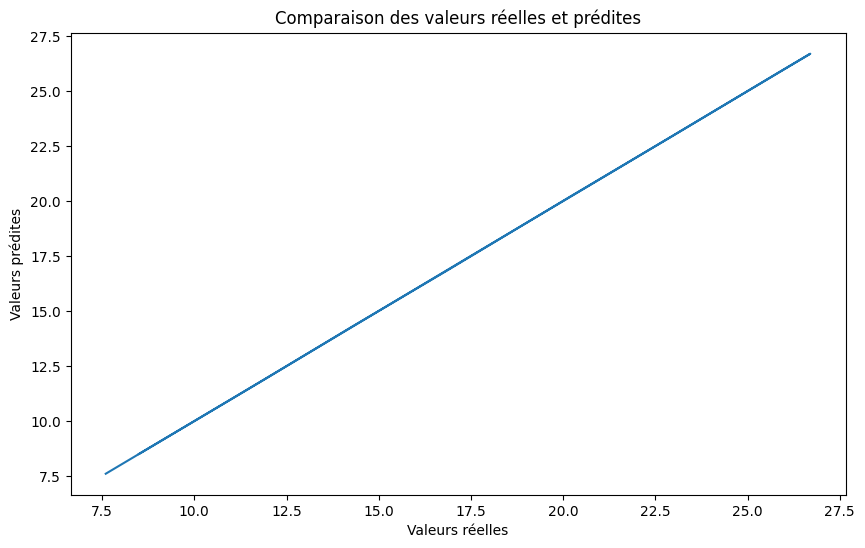

In [186]:
plt.figure(figsize=(10, 6))
y_pred = best_model_info["model"].predict(best_model_info["X"])
print(y_pred)
plt.plot(best_model_info["y"], y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison des valeurs réelles et prédites")
plt.show()

In [ ]:
if len(best_model_info["cols"]) < len(best_model_info["y"]) - 1:
    X_subset = sm.add_constant(best_model_info["X"])
    model_sm = sm.OLS(best_model_info["y"], X_subset).fit()
    print(model_sm.summary())
else:
    print("Trop de variables pour le nombre d’observations (pas assez de degrés de liberté).")


                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.461e+04
Date:                Tue, 27 May 2025   Prob (F-statistic):            0.00306
Time:                        20:26:10   Log-Likelihood:                 41.390
No. Observations:                  12   AIC:                            -60.78
Df Residuals:                       1   BIC:                            -55.45
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7130      0.732      7.806      0.0

Les variables ont un P-value inférieur a 0.05. Elles sont donc significatives

In [191]:
X_jan_2025 = df["Temperature_maximale"].values[12:24]
X_jan_2025_subset = X_jan_2025[list(best_model_info["cols"])]
y_pred_jan_2025 = best_model_info["model"].predict([X_jan_2025_subset])
print("Prédiction température max janvier 2025 :", y_pred_jan_2025[0])
print(f"L'erreur est de {abs(7.5 - y_pred_jan_2025[0]):.2f} °C")


Prédiction température max janvier 2025 : 7.816315712680659
L'erreur est de 0.32 °C


In [ ]:
temps_2024 = df["Temperature_maximale"].values[12:24].tolist()
predictions_2025 = []

for month_i in range(24, 28):  # janvier(24), février(25), mars(26), avril(27)
    X_pred = temps_2024[-12:]  # toujours les 12 derniers mois
    X_pred_subset = [X_pred[i] for i in best_model_info["cols"]]
    
    # Prédiction
    y_pred = best_model_info["model"].predict([X_pred_subset])[0]
    
    # Ajouter la prédiction à la liste des prédictions 2025
    predictions_2025.append(y_pred)
    
    # Ajouter cette prédiction aux données historiques pour la prochaine itération
    temps_2024.append(y_pred)

# Afficher les résultats
mois = {"janvier":7.5, "février":8.6, "mars":14.6, "avril":20}
for m, pred in zip(mois.keys(), predictions_2025):
    print(f"Prédiction température max {m} 2025 : {pred:.2f}")
    print(f"L'erreur est de {abs(mois[m] - pred):.2f} °C")


Prédiction température max janvier 2025 : 7.82
L'erreur est de 0.32 °C
Prédiction température max février 2025 : 8.33
L'erreur est de 0.27 °C
Prédiction température max mars 2025 : 11.81
L'erreur est de 2.79 °C
Prédiction température max avril 2025 : 19.30
L'erreur est de 0.70 °C
